# Corpora, Continued

## And Scikit-Learn

In [30]:
from nltk.corpus import gutenberg
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

**TF-IDF**: Term frequency, adjusted for inverse document frequency. 
 - Term frequency: the frequency with which words occur in your text
 - Inverse document frequency: the freq. with which words occur in your corpus. 
 
Or, a fancy way of getting distinguishing words of a document. At the moment, we'll be using the TfidfVectorizer, but we'll be turning off IDF, and just using it to make tables of word frequencies. 

Let's test it out on the NLTK's built-in `gutenberg` corpus of about 20 novels: 

In [3]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

Get tokens from particular works using `gutenberg.words()`: 

In [4]:
whitmanTokens = gutenberg.words('whitman-leaves.txt')
whitmanRaw = gutenberg.raw('whitman-leaves.txt')
hamletRaw = gutenberg.raw('shakespeare-hamlet.txt')

Or write a list comprehension that will do this for all the texts: 

In [5]:
allRaw = [gutenberg.raw(text) for text in gutenberg.fileids()]

Let's see how long each one is: 

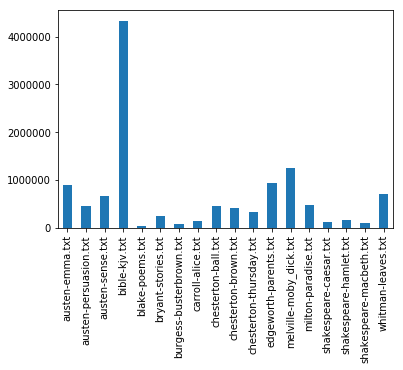

In [6]:
pd.Series([len(text) for text in allRaw], 
          index=gutenberg.fileids()).plot(kind='bar')

In [7]:
tfidf = TfidfVectorizer(use_idf=False, max_features=800)

In [8]:
tf = tfidf.fit_transform([whitmanRaw, hamletRaw])

In [9]:
tf

<2x800 sparse matrix of type '<class 'numpy.float64'>'
	with 1294 stored elements in Compressed Sparse Row format>

**Sparse matrix**: Matrix (table) with some values missing    
**Dense matrix**: That matrix filled in (think: fillna(0)). 

In [10]:
tfDense = tf.todense()

In [11]:
labels = tfidf.get_feature_names()

In [12]:
labels[658:670]

['sure',
 'surely',
 'swear',
 'sweet',
 'swift',
 'swiftly',
 'sword',
 'take',
 'talk',
 'tears',
 'teeming',
 'tell']

In [13]:
whDF = pd.DataFrame(tfDense, index=['Whitman', 'Hamlet'], 
                    columns=labels)

In [14]:
whDF

,about,above,advance,after,again,againe,against,age,ages,ah,...,year,years,yellow,yet,you,young,your,yours,yourself,youth
Whitman,0.002465,0.002689,0.001867,0.009860,0.011877,0.000000,0.002540,0.003585,0.002764,0.002390,...,0.003287,0.007619,0.00239,0.019571,0.114810,0.008814,0.027265,0.001270,0.00381,0.002465
Hamlet,0.008253,0.000000,0.000000,0.005647,0.000000,0.014768,0.008687,0.003475,0.000000,0.000869,...,0.000000,0.000434,0.00000,0.016071,0.228902,0.003909,0.109890,0.002606,0.00000,0.006081


Now we'll try again, but with all the texts. First, we instantiate our vectorizer, giving it all the options we want.

In [16]:
tfidf = TfidfVectorizer(use_idf=False, max_features=800)

Next, convert our list of texts to a matrix of word frequencies: 

In [17]:
allTf = tfidf.fit_transform(allRaw)

What does it look like? 

In [18]:
allTf

<18x800 sparse matrix of type '<class 'numpy.float64'>'
	with 11276 stored elements in Compressed Sparse Row format>

Since it's a sparse matrix, we have to convert it to a dense matrix for Pandas to understand it: 

In [19]:
allTfDense = allTf.todense()

Here's a better list of labels: 

In [20]:
allTextLabels = [text.split('.')[0] for text in gutenberg.fileids()]
allTextLabels[:3]

['austen-emma', 'austen-persuasion', 'austen-sense']

Now get the word labels: 

In [21]:
allWordLabels = tfidf.get_feature_names()

Now put it all in a Pandas DataFrame, along with the labels: 

In [22]:
allDf = pd.DataFrame(allTfDense, index=allTextLabels, columns=allWordLabels)
allDf

,10,11,12,13,14,15,16,17,18,19,...,ye,yea,year,years,yes,yet,you,young,your,yourself
austen-emma,0.000147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000515,0.000000,0.002060,0.004193,0.009196,0.008019,0.145660,0.014125,0.026778,0.004120
austen-persuasion,0.000134,0.000134,0.000134,0.000134,0.000134,0.000269,0.000269,0.000134,0.000134,0.000134,...,0.000269,0.000000,0.003627,0.007791,0.006448,0.007791,0.084362,0.011284,0.016657,0.001881
austen-sense,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,0.000096,...,0.000096,0.000000,0.005198,0.004717,0.005872,0.007509,0.114655,0.009916,0.037159,0.003658
bible-kjv,0.021160,0.021000,0.019671,0.019041,0.018651,0.017932,0.016902,0.015053,0.016003,0.015143,...,0.039812,0.003398,0.003688,0.005388,0.000040,0.006827,0.026158,0.002999,0.017842,0.000000
blake-poems,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.007529,0.000000,0.000000,0.007529,0.013552,0.001506,0.016564,0.000000
bryant-stories,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.001809,0.000201,0.001407,0.004423,0.005629,0.002011,0.092885,0.003016,0.017491,0.000603
burgess-busterbrown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000664,0.001992,0.006640,0.001992,0.075034,0.001992,0.004648,0.001992
carroll-alice,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000383,0.000000,0.000767,0.000383,0.004984,0.009584,0.157565,0.001917,0.023769,0.003834
chesterton-ball,0.000131,0.000131,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000653,0.000131,0.001698,0.001829,0.008882,0.008751,0.139233,0.006139,0.025339,0.001045
chesterton-brown,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000875,0.002479,0.004521,0.009771,0.100923,0.006417,0.013272,0.001458


# Stylometry

Stylometry is the "measurement of style." It's a way to show how the style of writers is similar or different. Style, in this case, deals with the 800 most frequent words, which are function words, rather than content words—they show not what 

Or, comparison of most frequent words. 

In [23]:
tfidf = TfidfVectorizer(use_idf=False, max_features=800)

In [24]:
allTf = tfidf.fit_transform(allRaw).todense()

In [25]:
allTf.shape

(18, 800)

In [26]:
pca = PCA(2)

In [27]:
pcaOut = pca.fit_transform(allTf)

In [28]:
pcaOut

array([[ 0.32333505, -0.08381139],
       [ 0.22136693, -0.1140211 ],
       [ 0.29950241, -0.07478352],
       [-0.2457221 ,  0.08488495],
       [-0.26052024,  0.09992633],
       [-0.13392442, -0.14444047],
       [ 0.10127414, -0.23486152],
       [ 0.0123094 , -0.16840572],
       [-0.10519774, -0.09191935],
       [-0.12196108, -0.14224833],
       [-0.120221  , -0.11867094],
       [ 0.13612398, -0.07050656],
       [-0.16890033, -0.04802805],
       [-0.0279306 ,  0.16799588],
       [ 0.16958361,  0.31548159],
       [ 0.14650093,  0.29245297],
       [ 0.05878538,  0.26462148],
       [-0.28440432,  0.06633375]])

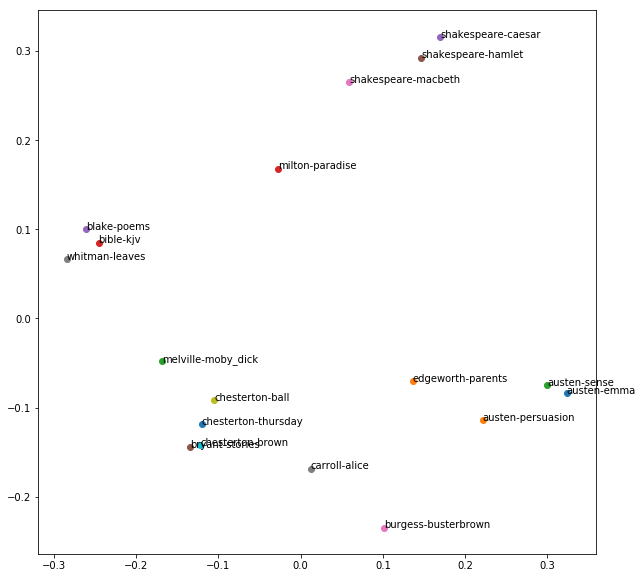

In [31]:
xs, ys = pcaOut[:,0], pcaOut[:,1]
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i])
    plt.annotate(allTextLabels[i], (xs[i], ys[i]))